# Homework 5 

## Part 1 - REST API



Import modules in python for communication and visualization


In [137]:

# Modules enabling communication between client and server
import requests
import json

# Modules for visualisation
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd



Request data about nobelprizes in physics between from year 2000 to 2010
at a specified loaction.


In [143]:

# Stating base location
base_url= "http://api.nobelprize.org/2.1"

# Specifying additional location info
endpoints = "/nobelPrizes"

# Specifying the parameters of the request
query = {
    "offset": 1,
    "limit": 10,
    "sort": "asc",
    "nobelPrizeYear": 2000,
    "yearTo": 2010,
    "nobelPrizeCategory": "phy",
    "format": "json"
}

# request and get data
response = requests.get(base_url + endpoints, params=query)



Convert the obtained data to a readable format


In [145]:

# Make sure the response is in json format
data = response.json()

# Print first year only in a structured layout
print(json.dumps(data["nobelPrizes"][0], indent=4))


{
    "awardYear": "2001",
    "category": {
        "en": "Physics",
        "no": "Fysikk",
        "se": "Fysik"
    },
    "categoryFullName": {
        "en": "The Nobel Prize in Physics",
        "no": "Nobelprisen i fysikk",
        "se": "Nobelpriset i fysik"
    },
    "dateAwarded": "2001-10-09",
    "prizeAmount": 10000000,
    "prizeAmountAdjusted": 13927869,
    "links": [
        {
            "rel": "nobelPrize",
            "href": "https://api.nobelprize.org/2/nobelPrize/phy/2001",
            "action": "GET",
            "types": "application/json"
        }
    ],
    "laureates": [
        {
            "id": "738",
            "knownName": {
                "en": "Eric Cornell"
            },
            "fullName": {
                "en": "Eric A. Cornell"
            },
            "portion": "1/3",
            "sortOrder": "1",
            "motivation": {
                "en": "for the achievement of Bose-Einstein condensation in dilute gases of alkali atoms, and


Loop through the data and extract all the different motivations in english for each year.
Assuming the motivation is the same for laureates that share a prize, 
it is sufficient to get hold of the motivation for the first laureat in the list each year. 

Generate a wordcloud from the words found in all the stated motivations.


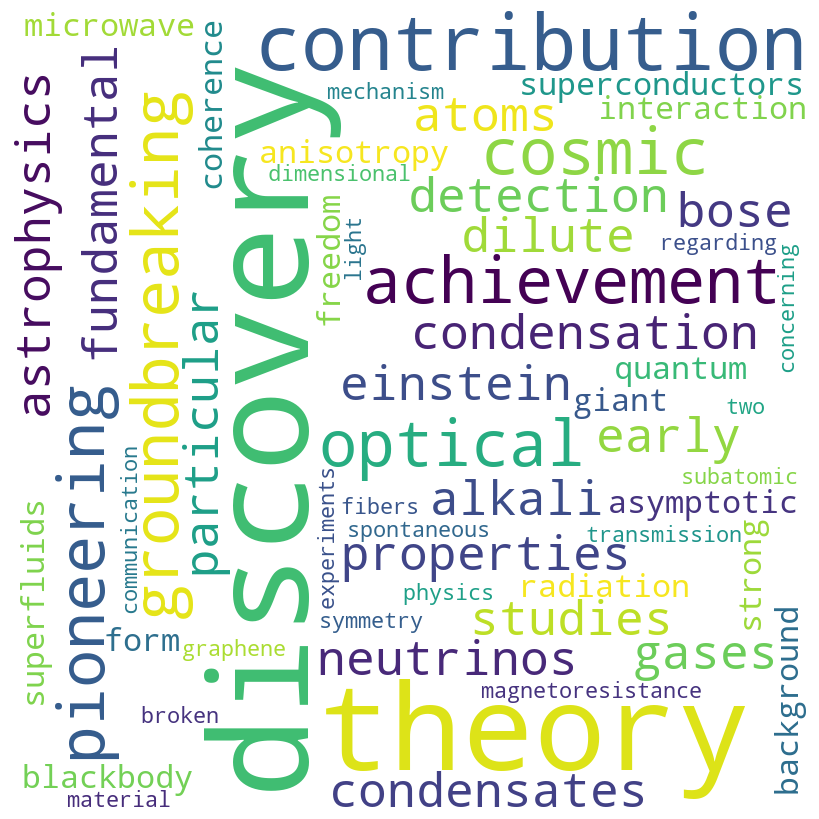

In [155]:


# Get number of years 
year_span = len(data["nobelPrizes"])

# Extract the list of nobelprizes for the requested period
nobelPrize_list = data["nobelPrizes"]

# Prepare an empty list to store words
motivation_list = []

# Loop through the number of years
for year in range(0,year_span):
    
    # Get the list of laureates for specific year
    laureat_list = nobelPrize_list[year]["laureates"]
    
    # Store motivation for this year in the list. It is same motivation for sharing laureates
    motivation_list.append(laureat_list[0]["motivation"]["en"])

# Join all motivations to one singel text with lower case
text = " ".join(motivation_words).lower()
 
# Define stopwords    
defined_stopwords = set(STOPWORDS)

# Generate wordcloud from text without stopwords
wordcloud = WordCloud(width=800, height=800, 
                      background_color="white", 
                      stopwords=defined_stopwords, min_font_size=6).generate(text)
    
    
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# Part 2 - Web Scraping     (not completed)




Import necessary modules in panda for web scraping


In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json

In [5]:
URL = "https://books.toscrape.com"
r = requests.get(URL)


In [9]:
html = BeautifulSoup(r.content)

In [46]:
html


<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="static